In [1]:
"""
Purpose: To Run the proofreading of neurons in the 
test set and measure the precision and recall of the new rules



"""

'\nPurpose: To Run the proofreading of neurons in the \ntest set and measure the precision and recall of the new rules\n\n\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-25 20:42:19,473 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:42:19,475 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:42:19,476 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:42:19,499 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-25 20:42:19,500 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:42:19,514 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-25 20:42:19,907 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:42:19,911 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:42:19,911 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:42:19,912 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:42:19,913 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:42:19,914 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:42:19,915 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:42:19,917 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:42:20,337 - settings - Setting enable_python_native_blobs to True


In [4]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-25 20:42:20,474 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:42:20,475 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:42:20,476 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:42:20,477 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:42:20,925 - settings - Setting enable_python_native_blobs to True


In [5]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Runnig the validation

In [6]:
"""
Psueodocode: 
1) Pull down the segment ids of the valid neurons

For each neuron
1) Dwonload the neuron object
2) Run the Proofreading
3) Print out the validation plot
4) Save the validation df

"""

'\nPsueodocode: \n1) Pull down the segment ids of the valid neurons\n\nFor each neuron\n1) Dwonload the neuron object\n2) Run the Proofreading\n3) Print out the validation plot\n4) Save the validation df\n\n'

In [7]:
segment_ids = minnie.AutoProofreadValidationBorderNeurons().fetch("segment_id")

In [8]:
job_idx = 3
job_step = 5
segments_to_process = segment_ids[job_idx*job_step:(job_idx+1)*job_step]
segments_to_process

array([864691136194103510, 864691136333776819, 864691136105498585,
       864691136333787571, 864691136105493209])


--- Working on Neuron 864691136194103510 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 353, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 2995, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 3348
n_valid_syn_ids_presyn = 353
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 2995
n_errored_syn_ids_postsyn = 0
Segment Id = 864691136194103510
Postsyn counts:
TP:2993
TN:0
FP:2
FN:0
Presyn counts:
TP:112
TN:0
FP:241
FN:0


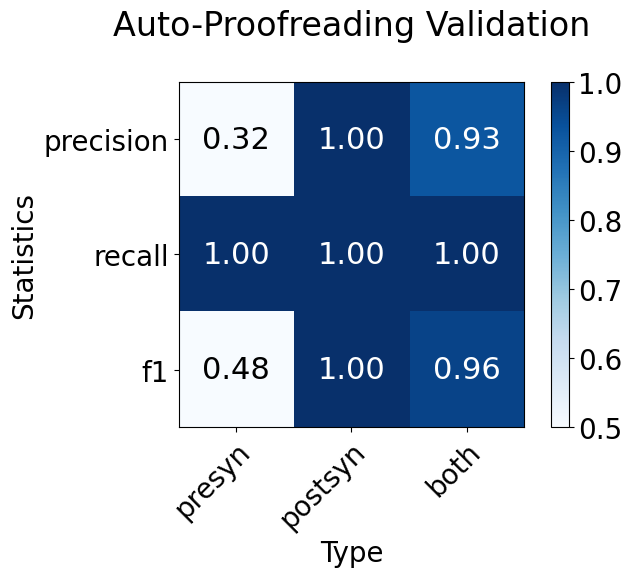

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691136194103510_validation_df.pbz2
File size is 0.068784 MB
Total time for neuron 864691136194103510: 114.2510883808136

--- Working on Neuron 864691136333776819 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 50, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 2030, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 2080
n_valid_syn_ids_presyn = 50
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 2030
n_errored_syn_ids_postsyn = 0
Segment Id = 864691136333776819
Postsyn counts:
TP:2026
TN:0
FP:4
FN:0
Presyn counts:
TP:13
TN:0
FP:37
FN:0


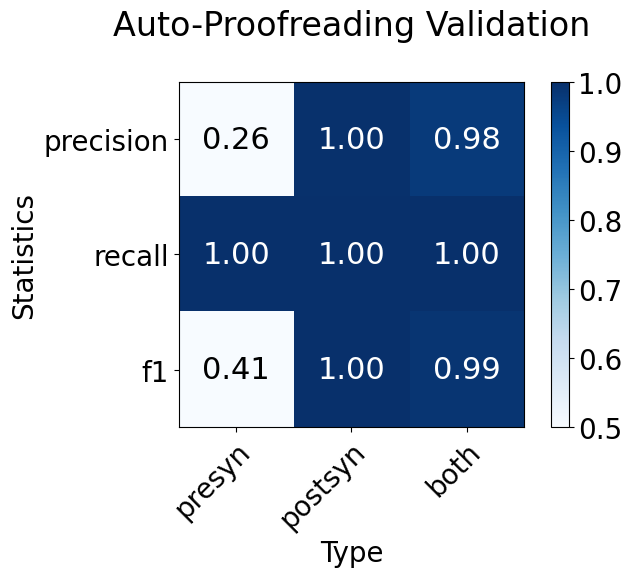

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691136333776819_validation_df.pbz2
File size is 0.042427 MB
Total time for neuron 864691136333776819: 60.176552057266235

--- Working on Neuron 864691136105498585 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 281, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 878, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 1159
n_valid_syn_ids_presyn = 281
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 878
n_errored_syn_ids_postsyn = 0
Segment Id = 864691136105498585
Postsyn counts:
TP:871
TN:0
FP:7
FN:0
Presyn counts:
TP:273
TN:0
FP:8
FN:0


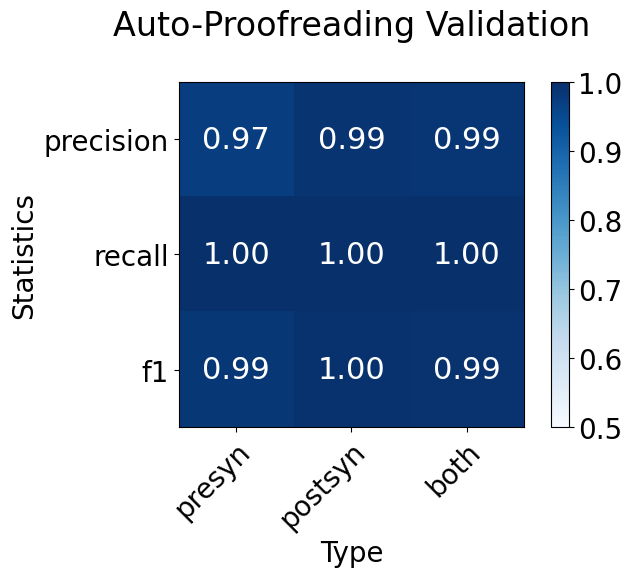

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691136105498585_validation_df.pbz2
File size is 0.025337 MB
Total time for neuron 864691136105498585: 104.25742387771606

--- Working on Neuron 864691136333787571 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 235, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 5610, # error synapses  = 1, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 5846
n_valid_syn_ids_presyn = 235
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 5610
n_errored_syn_ids_postsyn = 1
Segment Id = 864691136333787571
Postsyn counts:
TP:5604
TN:0
FP:6
FN:1
Presyn counts:
TP:18
TN:0
FP:217
FN:0


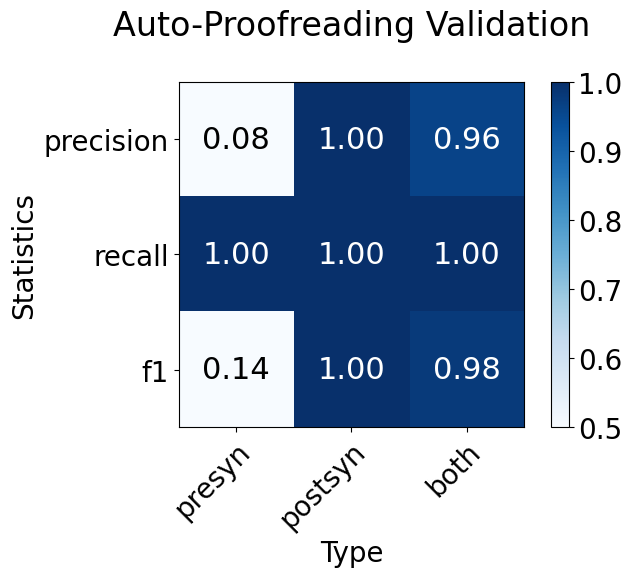

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691136333787571_validation_df.pbz2
File size is 0.116267 MB
Total time for neuron 864691136333787571: 111.86584854125977

--- Working on Neuron 864691136105493209 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 177, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 2801, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 2978
n_valid_syn_ids_presyn = 177
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 2801
n_errored_syn_ids_postsyn = 0
Segment Id = 864691136105493209
Postsyn counts:
TP:2797
TN:0
FP:4
FN:0
Presyn counts:
TP:126
TN:0
FP:51
FN:0


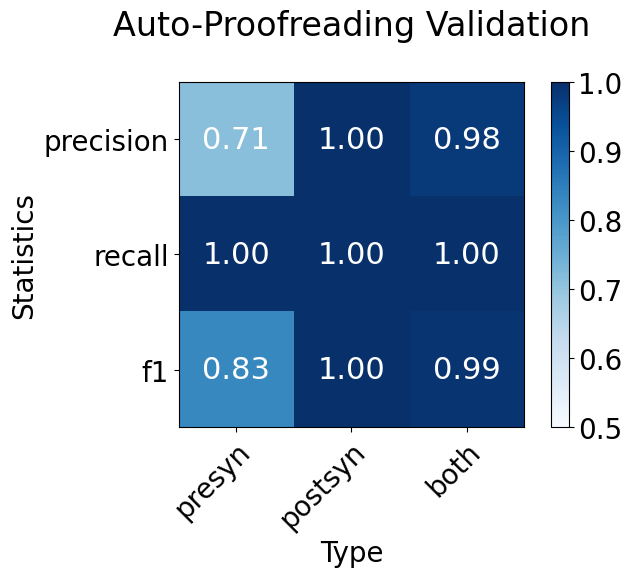

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691136105493209_validation_df.pbz2
File size is 0.060285 MB
Total time for neuron 864691136105493209: 77.71014285087585


In [9]:
for seg_id in segments_to_process:
    print(f"\n--- Working on Neuron {seg_id} --")
    st = time.time()
    
    
    #1) Dwonload the neuron object
    neuron_obj = du.fetch_neuron_obj_manual(seg_id,
                                       border_validation=True)
    
    (filt_neuron,
     return_synapse_df_revised,
    return_validation_df_revised) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                        filter_list = [],
                        plot_limb_branch_filter_with_disconnect_effect = False,
                        verbose = False,
                        plot_score=False,
                                                             apply_non_axon_presyn_errors = False)
    
    vu.synapse_validation_df_to_score_plot(return_validation_df_revised)
    
    su.compressed_pickle(return_validation_df_revised,f"./baseline_data/{seg_id}_validation_df")
    
    print(f"Total time for neuron {seg_id}: {time.time() - st}")